In [121]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
#read dataset(1987- 2016)
data=pd.read_csv('suicide.csv')

In [124]:
#print first 5 datapoints/rows
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [125]:
data.shape

(27820, 12)

This dataset has 27820 rows and has 12 columns

In [126]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

HDI- The Human Development Index (HDI) is a statistical tool used to measure a country's overall achievement in its social and economic dimensions. The social and economic dimensions of a country are based on the health of people, their level of education attainment and their standard of living.

In [127]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [129]:
data['country'].value_counts()

Mauritius                 382
Netherlands               382
Iceland                   382
Austria                   382
Luxembourg                372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Cabo Verde                 12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

The dataset has 101 countries listed

In [130]:
data['year'].describe()

count    27820.000000
mean      2001.258375
std          8.469055
min       1985.000000
25%       1995.000000
50%       2002.000000
75%       2008.000000
max       2016.000000
Name: year, dtype: float64

This dataset has the suicidal rates from 1985 to 2016

In [131]:
data['age'].value_counts()

75+ years      4642
35-54 years    4642
25-34 years    4642
55-74 years    4642
15-24 years    4642
5-14 years     4610
Name: age, dtype: int64

In [132]:
gender=pd.get_dummies(data['sex'])

In [133]:
data=pd.concat([data,gender],axis=1)

In [134]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,1,0
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,1,0
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0,1
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,1,0


In [135]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,1


In [136]:
data.drop(columns=['country-year','HDI for year'],inplace=True)

In [137]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,0,1


In [138]:
data.rename(columns={'suicides/100k pop' : 'Suicides100kPop',' gdp_for_year ($) ':'GDPForYear','gdp_per_capita ($)':'GDPPerCapita'},inplace=True)

In [139]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,0,1


In [140]:
data['GDPForYear']=data['GDPForYear'].apply(lambda x : x.replace(",",""))
data['GDPForYear']=data['GDPForYear'].astype('int64')

In [141]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,0,1


In [142]:
#Changing GDPForYear into million $
data['GDPForYear']=(data['GDPForYear'] / 1000000)

In [143]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,0,1


In [144]:
data.drop(columns=['generation'],inplace=True)

In [145]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,female,male
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,0,1
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,1,0
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,0,1


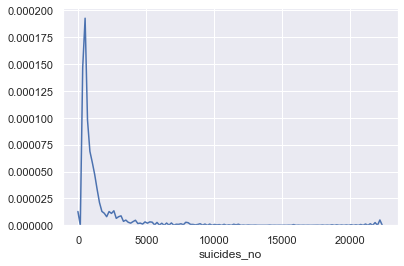

In [164]:
sns.distplot(data['suicides_no'],hist=False)

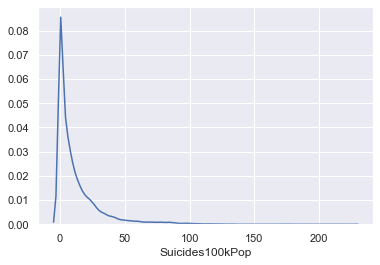

In [165]:
sns.distplot(data['Suicides100kPop'],hist=False)

In [166]:
lat_long=pd.read_csv('countries.csv')

In [167]:
lat_long.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [168]:
lat_long.drop(columns=['usa_state_code','usa_state_latitude','usa_state_longitude','usa_state'],inplace=True)

In [169]:
lat_long.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [170]:
temp1=pd.DataFrame(data['country'].unique())
temp2=pd.DataFrame(lat_long['country'].unique())
temp2.equals(temp1)

False

In [171]:
df=data.copy()
df=df.merge(lat_long,how='left',on='country')

In [172]:
df.loc[df.country_code.isnull()].country.unique()

array([], dtype=object)

In [173]:
data.loc[df['country']=='Cabo Verde','country']='Cape Verde'
data.loc[df['country']=='Republic of Korea','country']='South Korea'
data.loc[df['country']=='Russian Federation','country']='Russia'
data.loc[df['country']=='Saint Vincent and Grenadines','country']='Saint Vincent and the Grenadines'
data=data.merge(lat_long[['latitude','longitude','country']],how='left',on='country')

In [174]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,female,male,latitude_x,longitude_x,suicide_country,latitude_y,longitude_y
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,1,0,41.153332,20.168331,1970,41.153332,20.168331
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331


In [175]:
#Adding the column suicide_country with total suicides in a country value
temp = data.copy()
table = temp.groupby(['country'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(), how='left',on='country')
data['suicide_country'] = temp['suicides_no_y']
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,female,male,latitude_x,longitude_x,suicide_country,latitude_y,longitude_y
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,1,0,41.153332,20.168331,1970,41.153332,20.168331
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,0,1,41.153332,20.168331,1970,41.153332,20.168331


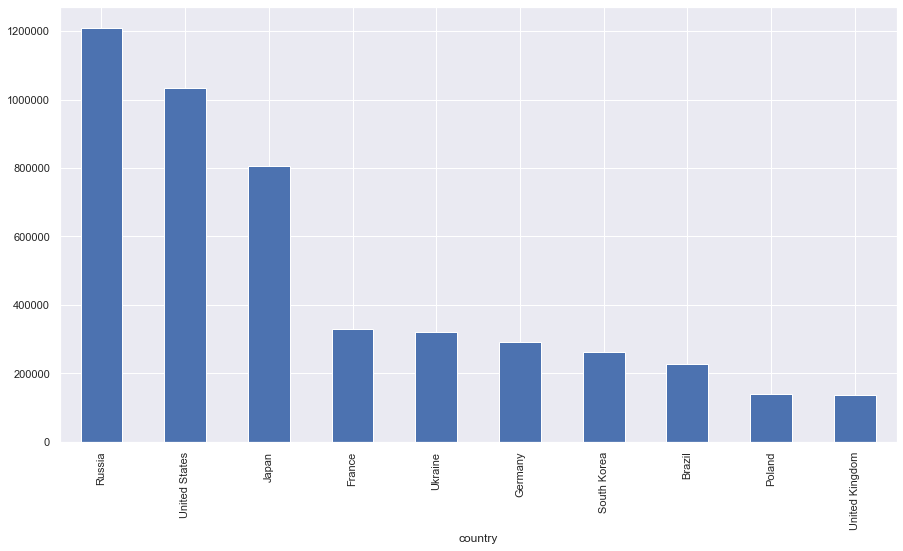

In [163]:
#Visualizing the top 10 countries with highest total suicide numbers
df = data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)
df.plot.bar(figsize=(15,8))

We can see that the top three countries with highest suicide count are - Russia, United States and Japan.

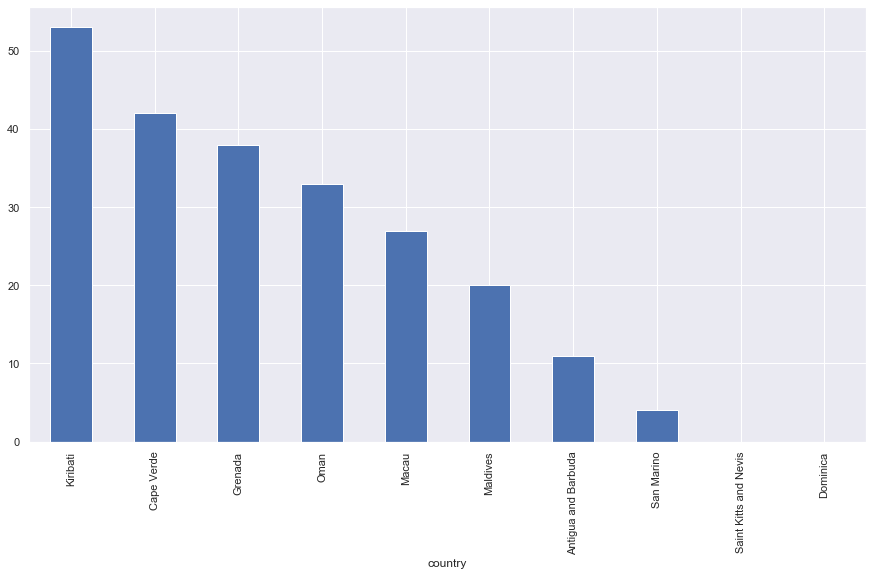

In [179]:
df = data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).tail(10)
df.plot.bar(figsize=(15,8))

These countries have very less suicide rates when compared to other countries

<Figure size 576x432 with 0 Axes>

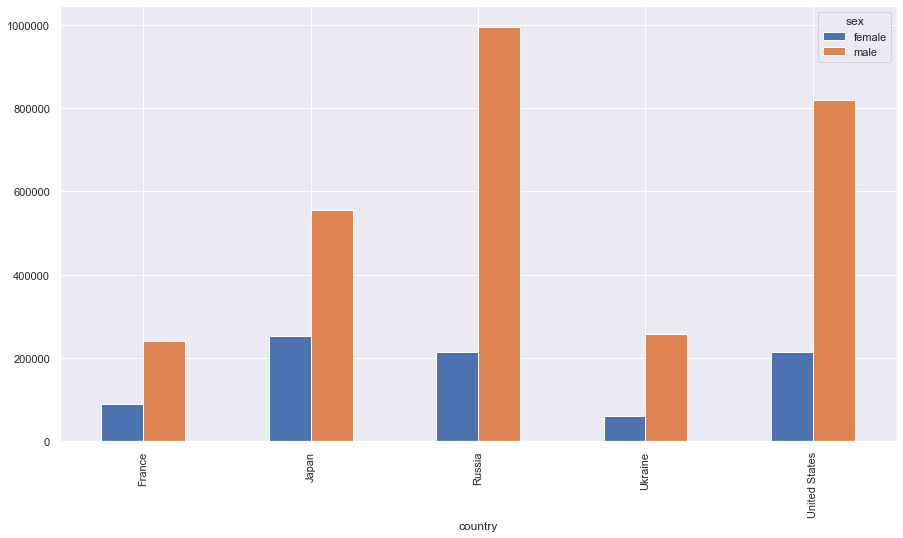

In [180]:
plt.figure(figsize=(8,6))
df = data.loc[((data.country=='Russia') | (data.country=='United States')
                     | (data.country=='Japan') | (data.country=='France')
                    | (data.country=='Ukraine'))].groupby(['country','sex'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8))

We can see that the top five countries with highest total suicides, the number of male suicides are consistently higher than female ones.

<Figure size 576x432 with 0 Axes>

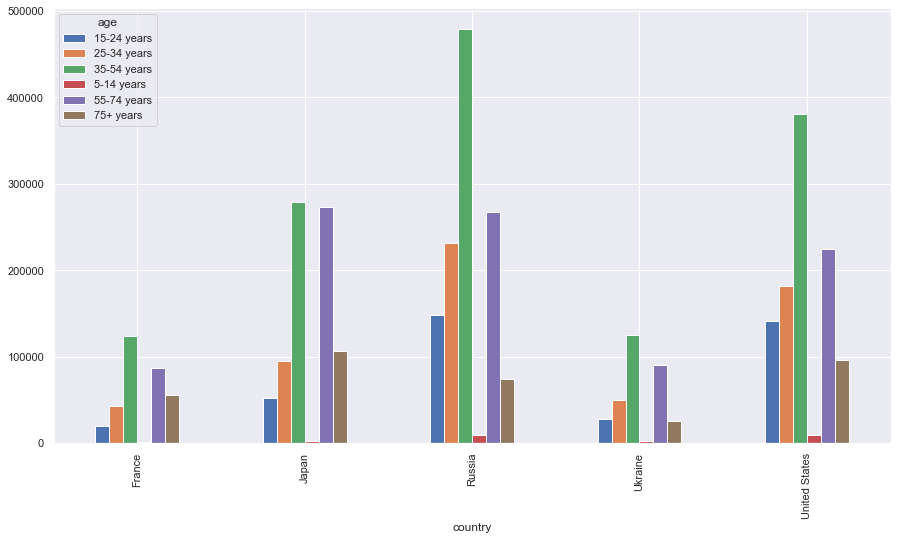

In [181]:
plt.figure(figsize=(8,6))
df = data.loc[((data.country=='Russia') | (data.country=='United States')
                     | (data.country=='Japan') | (data.country=='France')
                    | (data.country=='Ukraine'))].groupby(['country','age'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8))

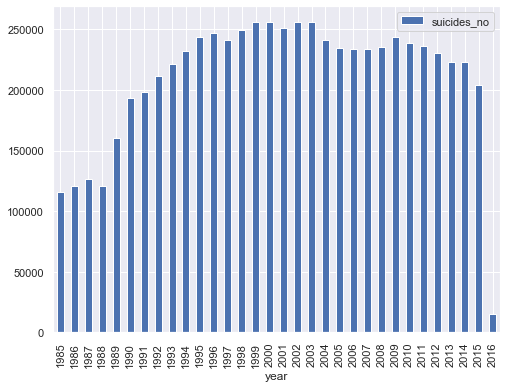

In [182]:
df = data.groupby(['year'])['suicides_no'].sum()
df.plot(kind='bar',legend=True,figsize=(8,6))

The suicide rate seems to be increasing between 1985-2000 and then slight decrease by 2015.

The significant difference between 2015-2016 might be because of less records in 2016 rather than any significant change in the suicide rate.

In [183]:
# Seeing the total number of suicides in a country in a particular year
temp = data.copy()
table = temp.groupby(['country','year'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(), how='left',on=['country','year'])
temp = temp.sort_values(by='suicides_no_y',ascending = False)
temp[['country','year','suicides_no_y']].drop_duplicates(keep='last').head(50)

,country,year,suicides_no_y
20999,Russia,1994,61420
21019,Russia,1995,60548
21022,Russia,1996,57511
21067,Russia,1999,56974
21080,Russia,2001,56958
21078,Russia,2000,56619
20984,Russia,1993,55846
21093,Russia,2002,55024
21032,Russia,1997,54746
21050,Russia,1998,51518


Russia, United States and Japan are topping the list

<Figure size 576x432 with 0 Axes>

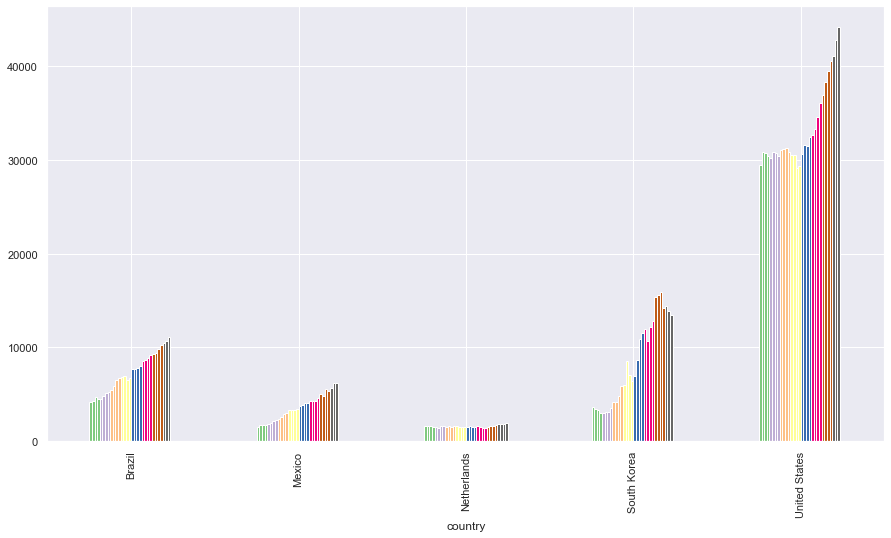

In [186]:
plt.figure(figsize=(8,6))
df = data.loc[((data.country=='United States') | (data.country=='Brazil')
                     | (data.country=='South Korea') | (data.country=='Mexico')
                    | (data.country=='Netherlands'))].groupby(['country','year'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8),legend=False,colormap='Accent')

While Brazil, Mexico and United States clearly show the increasing trend, South Korea has had it's peak in 1990's but it is an increasing trend clearly. For Netherlands, it mostly seems constant, with insignificant increasing number of suicide.

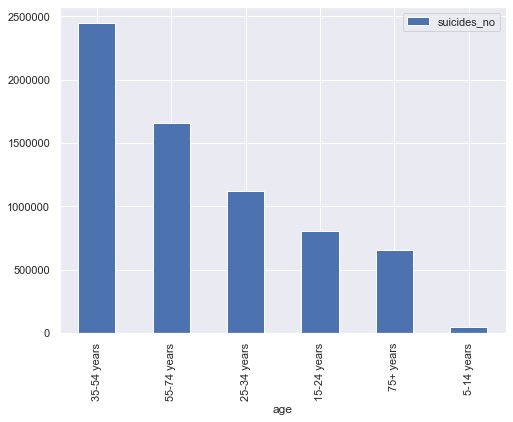

In [187]:
# A simple view of total number of suicides per age category in all the years from 1985 to 2016
df = data.groupby(['age'])['suicides_no'].sum().sort_values(ascending=False)
df.plot(kind='bar',legend=True,figsize=(8,6))

Clearly, age category 35-54 and 55-74 are more prone to suicides than other age groups.

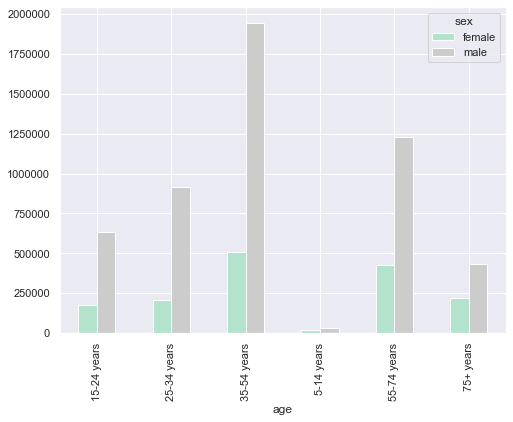

In [192]:
df = data.groupby(['age','sex'])['suicides_no'].sum().unstack(fill_value=0)
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel2')

In every age category the Male seems to have more suicide numbers than the female.

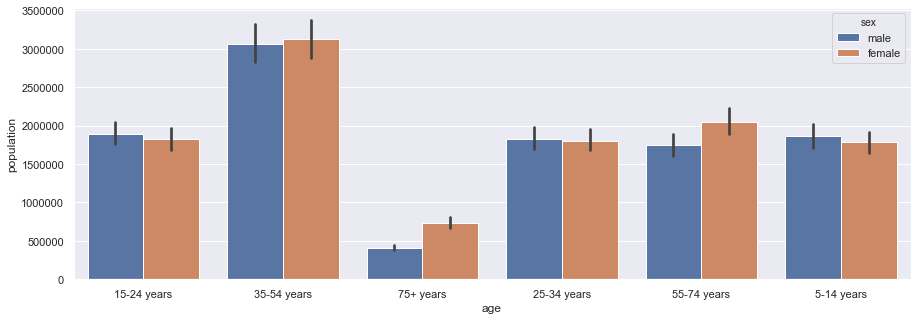

In [195]:
plt.figure(figsize=(15,5))
sns.barplot(x="age", y="population", hue="sex", data=data)

The sex ratio in every age category seems to be almost same. Hence the inference that the number of male suicides in each age category is far higher than female ones.

Since total suicide numbers are skewed by population of a country, suicides per hundred thousand people seems to be a better measure in deciding which country has more suicide rate per thousand people.

In [198]:
data.groupby(['year','country'])['Suicides100kPop'].sum().sort_values(ascending = False).head(20)

year  country  
1995  Lithuania    639.30
1996  Lithuania    595.61
1991  Hungary      575.00
2000  Lithuania    571.80
1992  Hungary      570.26
2001  Lithuania    568.98
1994  Russia       567.64
1998  Lithuania    566.36
1997  Lithuania    565.44
1999  Lithuania    561.53
1985  Sri Lanka    558.72
2002  Lithuania    555.62
1995  Russia       547.38
      Latvia       545.62
      Estonia      543.19
1993  Hungary      539.28
1994  Hungary      535.81
2003  Lithuania    530.52
1986  Sri Lanka    529.80
1996  Estonia      528.72
Name: Suicides100kPop, dtype: float64

Exploring the GDP of the countries which have hight suicidal rates, as well as an increasing trend.

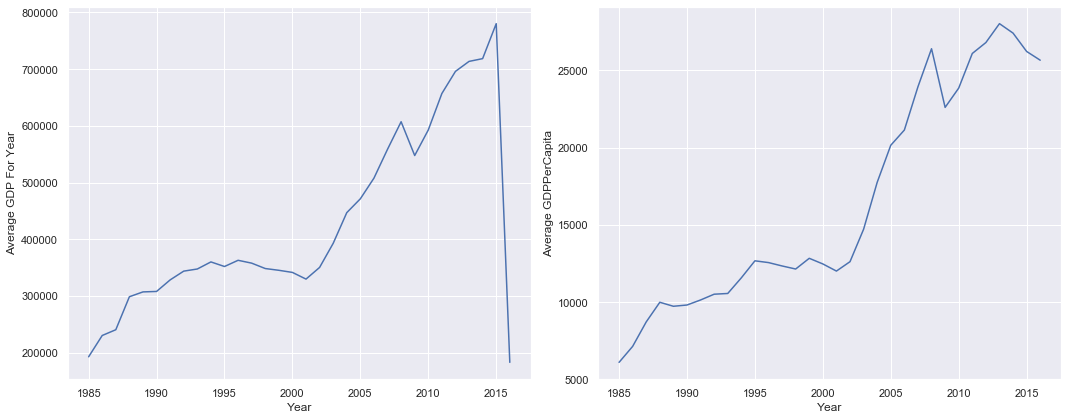

In [199]:
plt.figure(figsize=(15,6))

plt.subplot(121)
df_time = data.groupby(["year"]).GDPForYear.mean()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Average GDP For Year")

plt.subplot(122)
df_time = data.groupby(["year"]).GDPPerCapita.mean()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Average GDPPerCapita")
plt.tight_layout()
plt.show()